# Loading

In [1]:
!pip install scanpy
!pip install anndata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 78.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 77.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 9.8 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=e9a60710751b8c1289f1b6e9f70cf58b8b51b160ad023d1d059e0a10f6cf9c35
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8026 sha256=ffc92bb1e72c30fb6

In [ ]:
import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad

In [ ]:
!git clone https://github.com/chriscainx/gastric-cancer.git

Cloning into 'gastric-cancer'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 96 (delta 31), reused 64 (delta 10), pack-reused 0
Unpacking objects: 100% (96/96), 1.62 MiB | 10.13 MiB/s, done.


In [ ]:
#绘图参数设置
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [ ]:
!pip install --quiet scvi-colab
from scvi_colab import install
install()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 11.6 MB/s eta 0:00:00
INFO     scvi-colab: Installing scvi-tools.                                                                        
INFO     scvi-colab: Install successful. Testing import.                                                           


INFO:pytorch_lightning.utilities.seed:Global seed set to 0
/usr/local/lib/python3.8/dist-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/usr/local/lib/python3.8/dist-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [ ]:
import scvi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preprocess

In [ ]:
!wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE206nnn/GSE206785/suppl/GSE206785_metadata.txt.gz

--2023-01-27 06:32:19--  https://ftp.ncbi.nlm.nih.gov/geo/series/GSE206nnn/GSE206785/suppl/GSE206785_metadata.txt.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 165.112.9.230, 130.14.250.10, 2607:f220:41e:250::11, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|165.112.9.230|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118418 (116K) [application/x-gzip]
Saving to: ‘GSE206785_metadata.txt.gz’

GSE206785_metadata. 100%[===================>] 115.64K   214KB/s    in 0.5s    

2023-01-27 06:32:20 (214 KB/s) - ‘GSE206785_metadata.txt.gz’ saved [118418/118418]



In [ ]:
adata = sc.read_10x_mtx('/content/gastric-cancer/00.Processed Data/gcmatrix', var_names='gene_symbols', make_unique=True, cache=False,)
adata

KeyboardInterrupt: ignored

In [ ]:
data = pd.read_csv('/GSE206785_metadata.txt.gz',sep='\t')
adata.obs=data

In [ ]:
#adata = adata[adata.obs.pct_counts_mt < 10, :]
adata.layers["counts"] = adata.X.copy() # preserve counts
adata.write('/content/drive/MyDrive/Gastric/Cancer/Data/Gastric_Cancer_Origin.h5ad',compression='gzip')

In [ ]:
adata = sc.read_h5ad('/content/drive/MyDrive/Gastric/Cancer/Data/Gastric_Cancer_Origin.h5ad')
adata

/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 111140 × 25287
    obs: 'Sample', 'Patient', 'Tissue', 'Platform', 'Subtype', 'Type', 'Annotation'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'counts'

In [ ]:
#sc.pp.filter_cells(adata, min_genes=200)
#sc.pp.filter_cells(adata, max_genes=7500)
#sc.pp.filter_cells(adata, min_counts=500)
#sc.pp.filter_cells(adata, max_counts=75000)
#sc.pp.filter_genes(adata, min_cells=3)
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [ ]:
adata.obs

,Sample,Patient,Tissue,Platform,Subtype,Type,Annotation
0,171012N,P171012,Normal,SC3P,P01,Plasma,P01_Plasma_IgAλ
1,171012N,P171012,Normal,SC3P,P02,Plasma,P02_Plasma_IgAκ
2,171012N,P171012,Normal,SC3P,P02,Plasma,P02_Plasma_IgAκ
3,171012N,P171012,Normal,SC3P,P02,Plasma,P02_Plasma_IgAκ
4,171012N,P171012,Normal,SC3P,P01,Plasma,P01_Plasma_IgAλ
...,...,...,...,...,...,...,...
111135,190124T,P190124,Tumor,SC5P,B12,B,B12_Cycling_
111136,190124T,P190124,Tumor,SC5P,B12,B,B12_Cycling_
111137,190124T,P190124,Tumor,SC5P,B12,B,B12_Cycling_
111138,190124T,P190124,Tumor,SC5P,B12,B,B12_Cycling_


In [ ]:
scvi.model.SCVI.setup_anndata(
    adata,
    layer="counts",
    categorical_covariate_keys=["Sample"],
    continuous_covariate_keys=["pct_counts_mt"]
)

In [ ]:
model = scvi.model.SCVI(adata)

In [ ]:
model.train()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 1/72:   0%|          | 0/72 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/scvi/distributions/_negative_binomial.py:482: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 72/72: 100%|██████████| 72/72 [21:43<00:00, 18.02s/it, loss=3.51e+03, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=72` reached.


Epoch 72/72: 100%|██████████| 72/72 [21:43<00:00, 18.10s/it, loss=3.51e+03, v_num=1]


In [ ]:
latent = model.get_latent_representation()
adata.obsm["X_scVI"] = latent

In [ ]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
adata.raw=adata

In [ ]:
adata = adata[:, adata.var.highly_variable]

In [ ]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(adata, max_value=10)

In [ ]:
adata.write('/content/drive/MyDrive/Gastric/Cancer/Data/Gastric_Cancer_preprocessed.h5ad',compression='gzip')

# Cluster

In [1]:
!pip install scanpy 
import scanpy as sc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 64.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 7.2 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=f7ba700e6a00e92bb750ca3eda2275dcd94a7febfbfccac834d5bd5ddc129126
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8026 sha256=0b000eb5541640fed

In [2]:
adata = sc.read_h5ad('/content/drive/MyDrive/Gastric/Cancer/Data/Gastric_Cancer_preprocessed.h5ad')
adata

AnnData object with n_obs × n_vars = 111140 × 2000
    obs: 'Sample', 'Patient', 'Tissue', 'Platform', 'Subtype', 'Type', 'Annotation', '_scvi_batch', '_scvi_labels', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'log1p'
    obsm: 'X_scVI', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts'

In [3]:
#sc.tl.pca(adata, n_comps=100, svd_solver="arpack")
sc.pp.neighbors(adata, use_rep="X_scVI", metric="cosine",n_neighbors=20, random_state = 112)

In [4]:
!pip3 install leidenalg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 83.3 MB/s eta 0:00:00


In [5]:
sc.tl.leiden(adata)
sc.tl.paga(adata)
sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata,init_pos='paga')

In [6]:
!pip install matplotlib==3.1.3
import matplotlib
import scanpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 MB 41.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.1.3-cp310-cp310-linux_x86_64.whl size=12068277 sha256=100bb45621515354ef1cb0ed0deaed2ed6676282efe9b8e4319d37e1f9325060
  Stored in directory: /root/.cache/pip/wheels/a7/83/5a/c704868d367ace343ac89b928f3d937313a5b5fb5731483705
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.15.1 requires matplotlib>=3.2, but you have matplotlib 3.1.3 which is incompatible.
mizani 0.8.1 requires matplotlib>=

In [7]:
adata

AnnData object with n_obs × n_vars = 111140 × 2000
    obs: 'Sample', 'Patient', 'Tissue', 'Platform', 'Subtype', 'Type', 'Annotation', '_scvi_batch', '_scvi_labels', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'log1p', 'neighbors', 'leiden', 'paga', 'leiden_sizes', 'umap'
    obsm: 'X_scVI', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs', 'X_umap'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


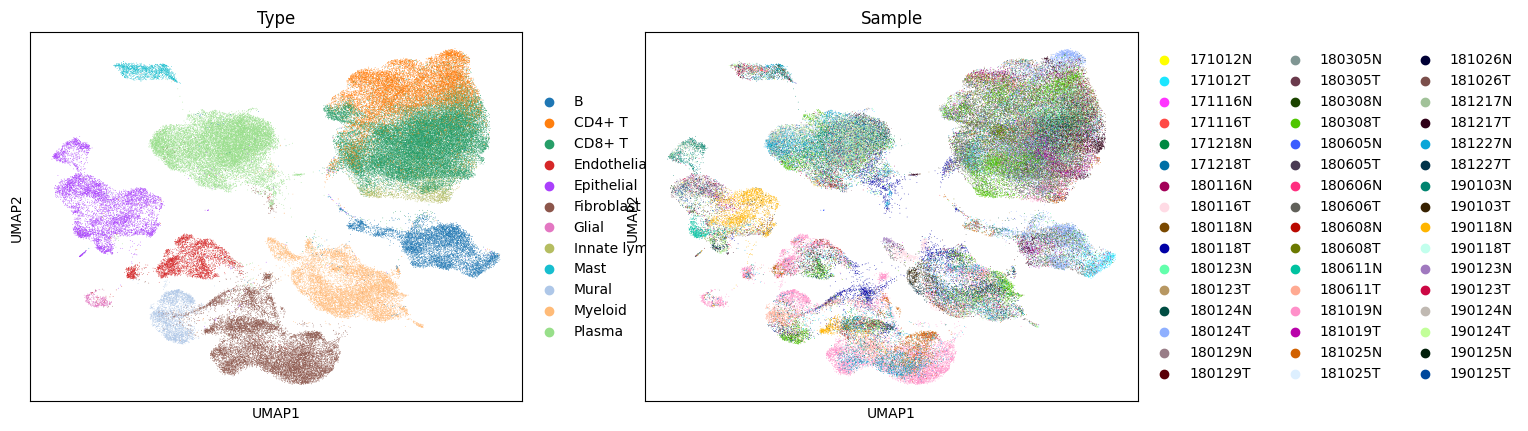

In [8]:
sc.pl.umap(adata,color=['Type','Sample'])

In [9]:
marker_genes_dict = {
    'Epithelial cell':['MUC5AC','MUC1','CDH1'],#上皮细胞
    'B cell(Plasma cell)':['MZB1','DERL3','IGKC'],#浆细胞（B细胞一种）
    'B cell':['CD79A','MS4A1','BANK1'],
    'Endocrine cell':['CHGA','PCSK1N','SCG5'],#内分泌细胞,
    'Myeloid cell':['AIF1','CD68','MS4A7'],#髓系细胞
    'Mast cell':['TPSAB1','TPSB2','CPA3'],#肥大细胞
    'Fibroblast':['DCN','DPT','PDGFRA'],#成纤维细胞
    'NK/T cell':['CD2','CD3E','CD7'], 
    'Smooth muscle cell':['ACTA2','MYH11','ACTG2'],#平滑肌细胞
    'Endothelial cell':['CLDN5','PECAM1','ACKR1'],#内皮细胞
}

         Falling back to preprocessing with `sc.pp.pca` and default params.
categories: B, CD4+ T, CD8+ T, etc.
var_group_labels: Epithelial cell, B cell(Plasma cell), B cell, etc.


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


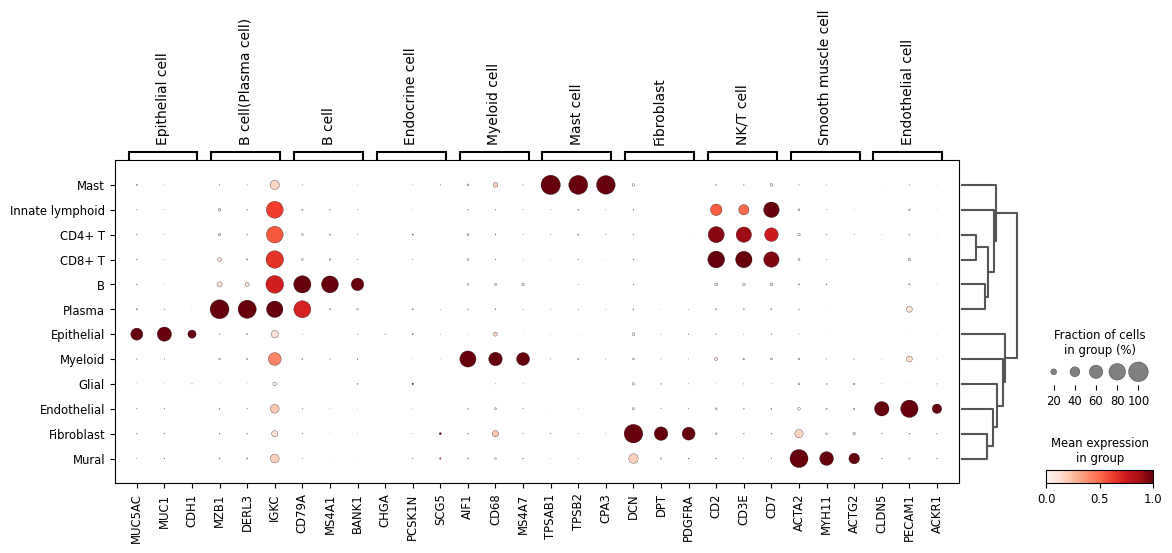

In [10]:
sc.pl.dotplot(adata, marker_genes_dict, 'Type' ,standard_scale='var', dendrogram=True)

In [11]:
adata.write('/content/drive/MyDrive/Gastric/Cancer/Data/Gastric_Cancer_cluster.h5ad',compression='gzip')